# Running code from the book

In [12]:
library(rethinking)

Loading required package: rstan

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.7, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Loading required package: cmdstanr

This is cmdstanr version 0.5.3

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- Use set_cmdstan_path() to set the path to CmdStan

- Use install_cmdstan() to install CmdStan

Loading required package: parallel

rethinking (Version 2.21)


Attaching package: ‘rethinking’


The following object is masked from ‘package:rstan’:

    stan


The following object is masked from ‘package:stats’:

    rstudent




In [13]:
data(Howell1)
d <- Howell1

In [14]:
d2 <- d[d$age >= 18, ]

4.24

In [15]:
d3 <- sample(d2$height, size = 20)

In [1]:
mu.list <- seq(from=150, to=170, length.out=200)

In [2]:
sigma.list <- seq(from =4, to = 20, length.out = 200)

In [3]:
post2 <- expand.grid(mu = mu.list, sigma = sigma.list)

In [8]:
post2

mu,sigma
<dbl>,<dbl>
150.0000,4
150.1005,4
150.2010,4
150.3015,4
150.4020,4
150.5025,4
150.6030,4
150.7035,4
150.8040,4


In [17]:
post2$LL <- sapply(1:nrow(post2), function(i) sum(dnorm(d3, mean = post2$mu[i], sd = post2$sigma[i], log=TRUE)))

In [19]:
post2$prod <- post2$LL + dnorm(post2$mu, 178, 20, TRUE)+dunif(post2$sigma, 0, 50, TRUE)

In [20]:
post2$prob <- exp(post2$prod - max(post2$prod))

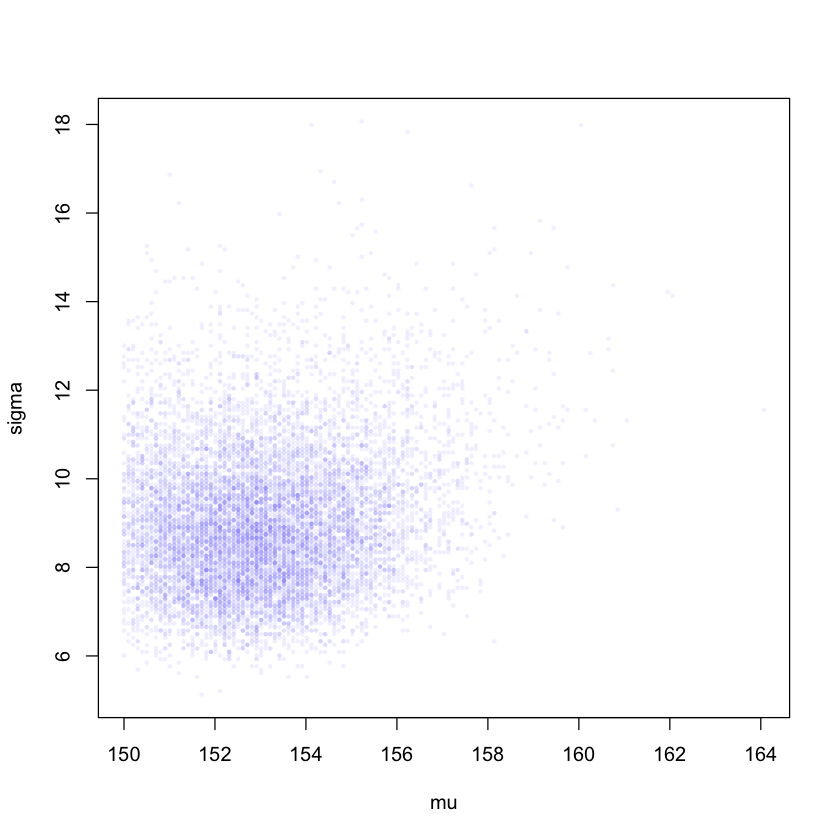

In [22]:
sample2.rows <- sample(1:nrow(post2), size=1e4, replace = TRUE, prob = post2$prob) 
sample2.mu <- post2$mu[sample2.rows]
sample2.sigma <- post2$sigma[sample2.rows]
plot(sample2.mu, sample2.sigma, cex=0.5, col = col.alpha(rangi2, 0.1), xlab = 'mu', ylab = 'sigma', pch = 16)

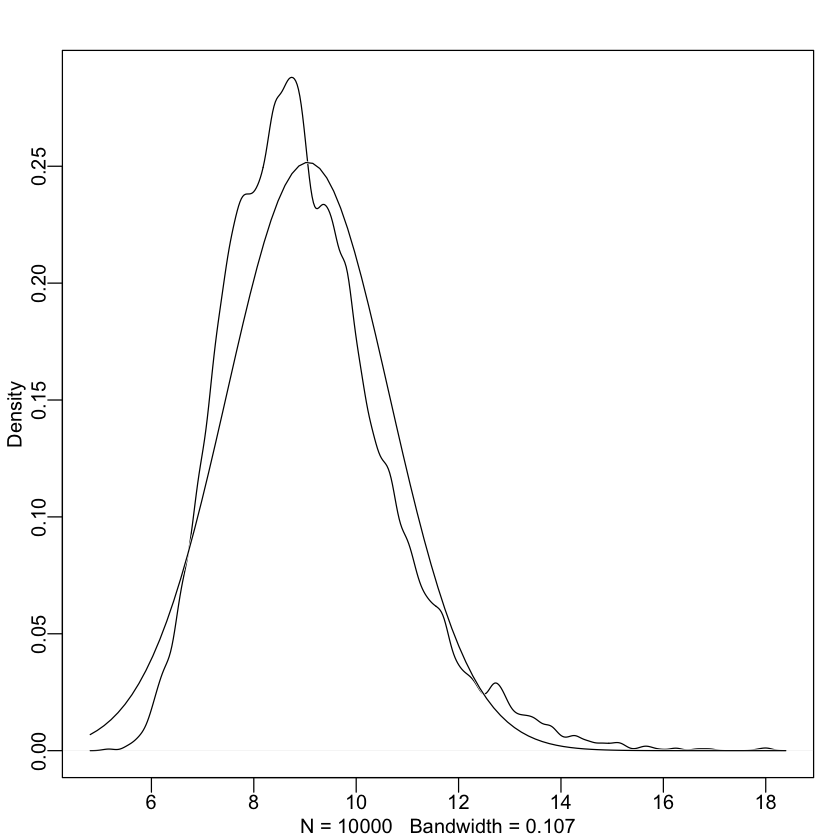

In [23]:
dens(sample2.sigma, norm.comp = TRUE)

In [25]:
help(alist)

list {base},R Documentation
...,"objects, possibly named."
x,object to be coerced or tested.
all.names,a logical indicating whether to copy all values or (default) only those whose names do not begin with a dot.
sorted,"a logical indicating whether the names of the resulting list should be sorted (increasingly). Note that this is somewhat costly, but may be useful for comparison of environments."


In [26]:
flist <- alist(
    height ~ dnorm(mu, sigma),
    mu ~ dnorm(178, 20), 
    sigma ~ dunif(0, 50)
    )

In [27]:
flist

[[1]]
height ~ dnorm(mu, sigma)

[[2]]
mu ~ dnorm(178, 20)

[[3]]
sigma ~ dunif(0, 50)


In [28]:
m4.1 <- quap(flist, data = d2)

In [29]:
precis(m4.1)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
mu,154.607169,0.4119772,153.948750,155.265588
sigma,7.731005,0.2913551,7.265363,8.196647


## 4.4

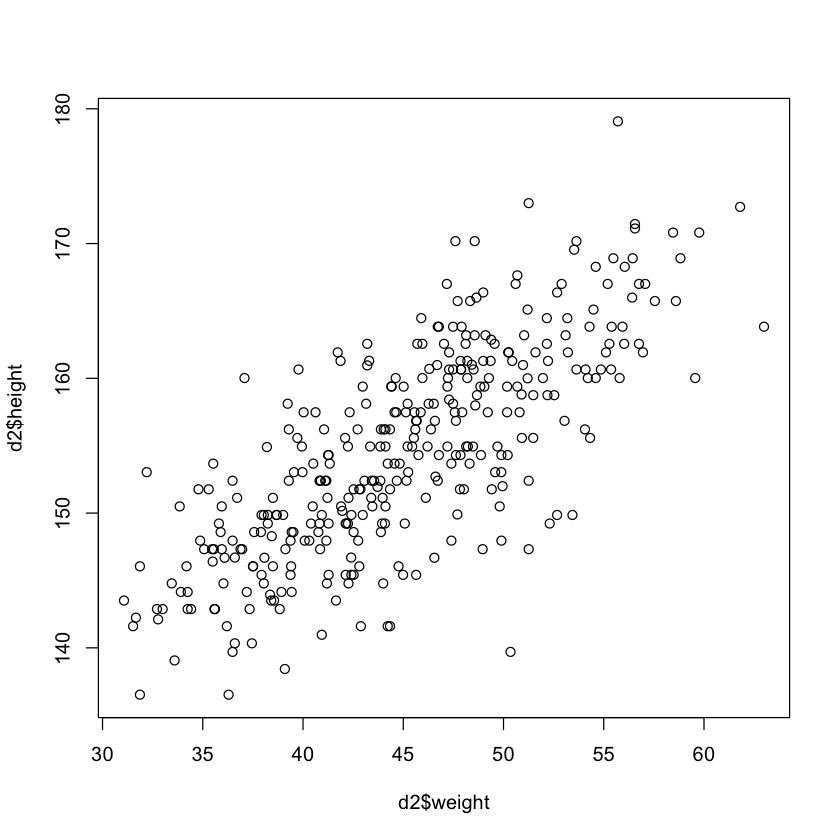

In [30]:
plot(d2$height ~ d2$weight)

In [31]:
set.seed(2971)
N <- 100
a <- rnorm(N, 178, 20)
b <- rnorm(N, 0, 10)

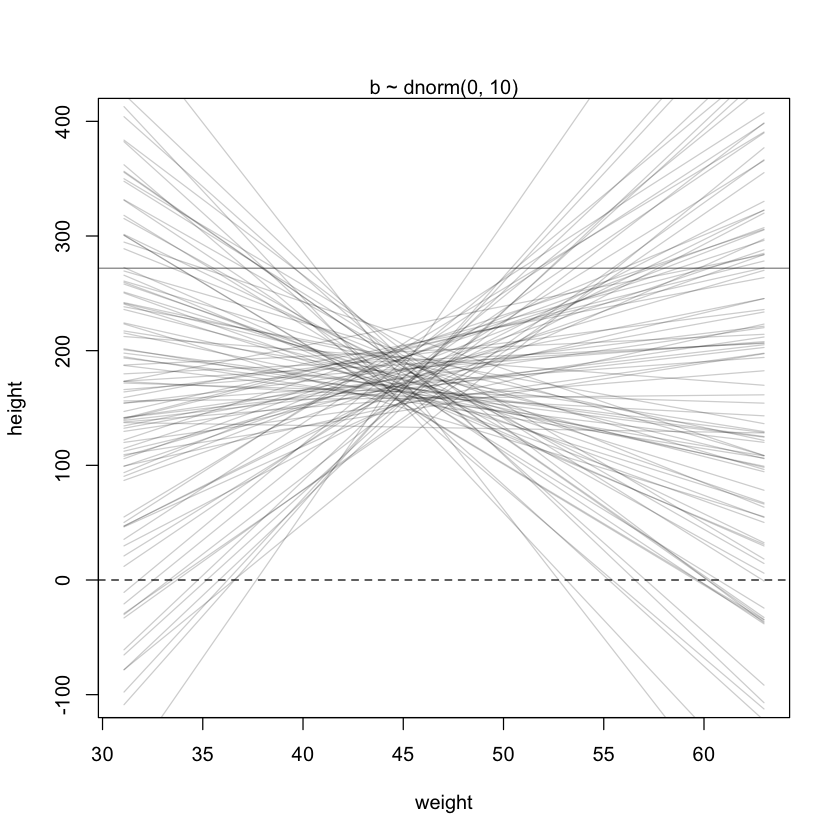

In [34]:
plot(NULL, xlim = range(d2$weight), ylim = c(-100, 400), xlab = 'weight', ylab = 'height')
abline(h=0, lty = 2)
abline(h=272, lty=1, lwd = 0.5)
mtext("b ~ dnorm(0, 10)") 
xbar <- mean(d2$weight)
for (i in 1:N) curve(a[i]+b[i]*(x-xbar), from=min(d2$weight), to = max(d2$weight), add = TRUE, col = col.alpha("black", 0.2))

In [35]:
b <- rlnorm(1e4, 0, 1)

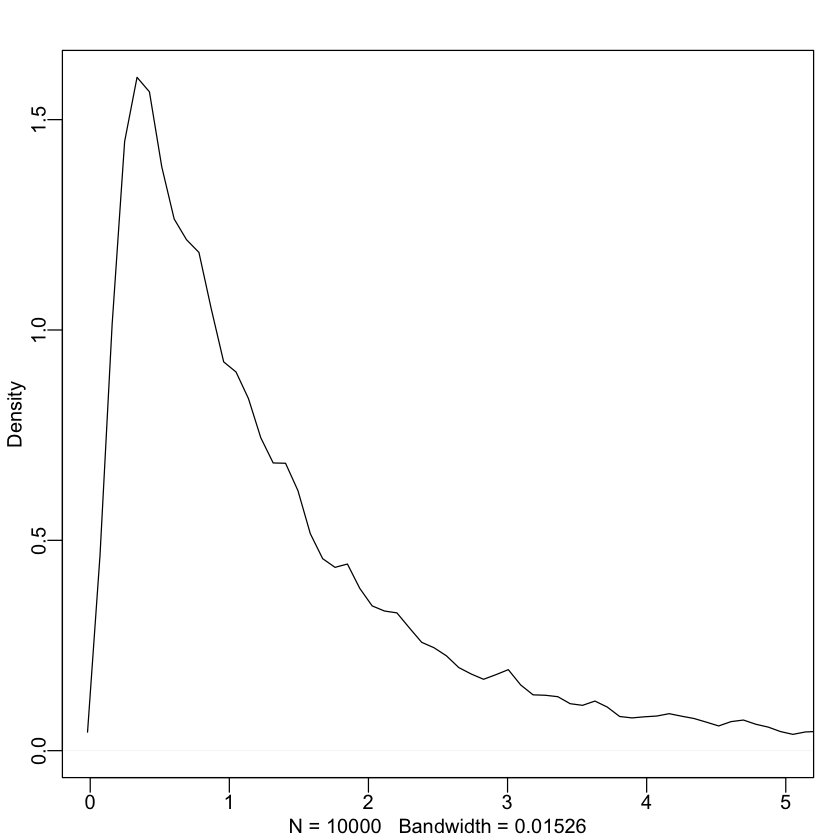

In [36]:
dens(b, xlim=c(0,5), adj = 0.1)

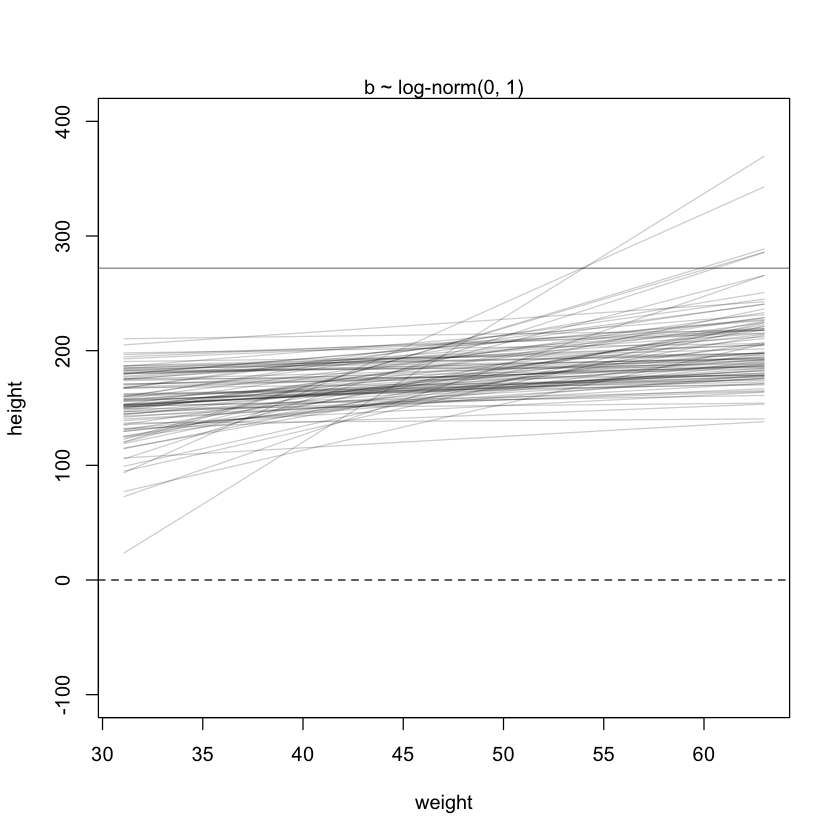

In [39]:
plot(NULL, xlim = range(d2$weight), ylim = c(-100, 400), xlab = 'weight', ylab = 'height')
abline(h=0, lty = 2)
abline(h=272, lty=1, lwd = 0.5)
mtext("b ~ log-norm(0, 1)") 
xbar <- mean(d2$weight)
for (i in 1:N) curve(a[i]+b[i]*(x-xbar), from=min(d2$weight), to = max(d2$weight), add = TRUE, col = col.alpha("black", 0.2))